# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 입력 Feature에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습대상 Parameter가 된다.

$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)

### Boston DataSet
보스톤의 지역별 집값 데이터셋

 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  지역의 주택가격 중앙값 (단위: $1,000)


In [87]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [88]:
boston = load_boston()
X, y = boston.data, boston.target

X.shape, y.shape

C:\Users\Playdata\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

((506, 13), (506,))

In [89]:
df = pd.DataFrame(X, columns=boston.feature_names)
df['MEDV'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [91]:
df.CHAS.value_counts()  #범주형
# 선형회귀

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [92]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## LinearRegression
- 가장 기본적인 선형 회귀 모델

### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

#####  CHAS Feature 원핫인코딩

In [93]:
df2 = pd.get_dummies(df, columns=['CHAS'])#, drop_first=True)
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0.0,CHAS_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


##### X, y 분리, train/test set 나누기

In [94]:
y = df2['MEDV']
X = df2.drop(columns='MEDV')
X.shape, y.shape

((506, 14), (506,))

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  #회귀: stratify를 설정하지 않는다.
X_train.shape, X_test.shape

((379, 14), (127, 14))

##### Feature scaling

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0.0', 'CHAS_1.0'],
      dtype='object')

##### 평가지표 함수

In [98]:
from metrics import print_regression_metrics

In [99]:
# from sklearn.metrics import mean_squared_error, r2_score

# def print_regression_metrics(y, pred, title=None):
#     mse = mean_squared_error(y, pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y, pred)
#     if title:
#         print(title)
#     print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")
#     print("-"*100)

##### 모델 생성, 학습, 추론, 평가

In [100]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [101]:
# bias
lr.intercept_

22.608707124010557

In [102]:
# 각 feature 에 곱해주는 가중치(weight, coefficient)
lr.coef_

array([-0.97100092,  1.04667838, -0.04044753, -1.80876877,  2.60991991,
       -0.19823317, -3.00216551,  2.08021582, -1.93289037, -2.15743759,
        0.75199122, -3.59027047, -0.29704388,  0.29704388])

In [103]:
# y_pred = lr.coef_ @ X_train.T + 22.608707124010557

### Coeficient의 부호
- weight가 
- 양수: Feature가 1 증가할때 y(집값)도 weight만큼 증가한다.
- 음수: Feature가 1 증가할때 y(집값)도 weight만큼 감소한다.
- 절대값 기준으로 0에 가까울 수록 집값에 영향을 주지 않고 크면 클수록(0에서 멀어질 수록) 집값에 영향을 많이 주는 Feature 란 의미가 된다.

In [104]:
pd.Series(lr.coef_, index=X_train.columns)

CRIM       -0.971001
ZN          1.046678
INDUS      -0.040448
NOX        -1.808769
RM          2.609920
AGE        -0.198233
DIS        -3.002166
RAD         2.080216
TAX        -1.932890
PTRATIO    -2.157438
B           0.751991
LSTAT      -3.590270
CHAS_0.0   -0.297044
CHAS_1.0    0.297044
dtype: float64

##### 평가

In [105]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_regression_metrics(y_train, pred_train, title='LinearRegressor: Train')
print_regression_metrics(y_test, pred_test, title="LinearRegressor: Test")

LinearRegressor: Train
MSE:19.640519427908046, RMSE:4.4317625644779355, R Square:0.7697699488741149
LinearRegressor: Test
MSE:29.782245092302407, RMSE:5.457311159564059, R Square:0.6354638433202124


In [106]:
print('정답:', y_test[:5].values)
print('예측:', pred_test[:5])

정답: [22.6 50.  23.   8.3 21.2]
예측: [24.95233283 23.61699724 29.20588553 11.96070515 21.33362042]


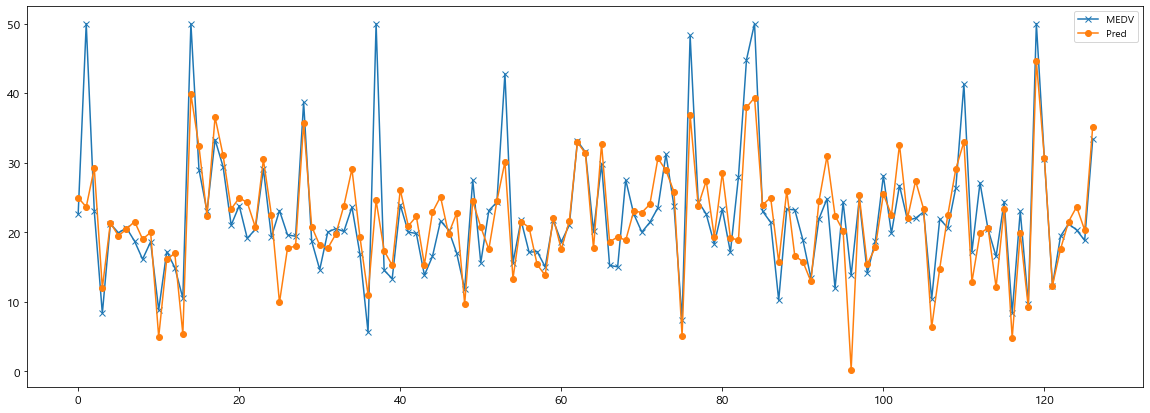

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.plot(range(len(y_test)), y_test, label='MEDV', marker='x')
plt.plot(range(len(y_test)), pred_test, label='Pred', marker='o')
plt.legend()
plt.show()

# 다항회귀 (Polynomial Regression)
- 단순한 직선형 보다 복잡한 비선형의 데이터셋을 학습하기 위한 방식.
    - Feature가 너무 적어 y의 값들을 다 표현 하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한 뒤 선형모델로 훈련시킨다.
    - 파라미터 가중치를 기준으로는 일차식이 되어 선형모델이다. 파라미터(Coef, weight)들을 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [108]:
X**2 + X + 2

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0.0,CHAS_1.0
0,2.006360,344.0,9.6461,2.827444,51.805625,4318.24,22.818100,4.0,87914.0,251.39,157928.5100,31.7804,4,2
1,2.028056,2.0,59.0549,2.688961,49.650241,6306.11,31.639182,8.0,58808.0,336.64,157928.5100,94.6796,4,2
2,2.028035,2.0,59.0549,2.688961,60.809225,3796.31,31.639182,8.0,58808.0,336.64,154710.2389,22.2709,4,2
3,2.033418,2.0,8.9324,2.667764,57.970004,2145.44,44.812469,14.0,49508.0,370.39,156129.4669,13.5836,4,2
4,2.073818,2.0,8.9324,2.667764,60.226609,2993.84,44.812469,14.0,49508.0,370.39,157928.5100,35.7389,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2.066553,2.0,156.2549,2.901329,52.060649,4845.91,10.622058,4.0,74804.0,464.00,154050.1501,105.1789,4,2
502,2.047319,2.0,156.2549,2.901329,45.574400,5961.59,9.520156,4.0,74804.0,464.00,157928.5100,93.5264,4,2
503,2.064452,2.0,156.2549,2.901329,57.640576,8374.00,8.865556,4.0,74804.0,464.00,157928.5100,39.4496,4,2
504,2.121600,2.0,156.2549,2.901329,54.952436,8065.79,10.095743,4.0,74804.0,464.00,155198.3525,50.4704,4,2


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

m = 100   # 데이터개수
X = 6 * np.random.rand(m, 1) - 3   #X: feature(1개)
y = X**2 + X + 2 + np.random.normal(0,1, size=(m,1))  # y: Target
y = y.flatten()
print(X.shape, y.shape)

(100, 1) (100,)


In [110]:
np.random.rand(m, 1)

array([[0.20747008],
       [0.42468547],
       [0.37416998],
       [0.46357542],
       [0.27762871],
       [0.58678435],
       [0.86385561],
       [0.11753186],
       [0.51737911],
       [0.13206811],
       [0.71685968],
       [0.3960597 ],
       [0.56542131],
       [0.18327984],
       [0.14484776],
       [0.48805628],
       [0.35561274],
       [0.94043195],
       [0.76532525],
       [0.74866362],
       [0.90371974],
       [0.08342244],
       [0.55219247],
       [0.58447607],
       [0.96193638],
       [0.29214753],
       [0.24082878],
       [0.10029394],
       [0.01642963],
       [0.92952932],
       [0.66991655],
       [0.78515291],
       [0.28173011],
       [0.58641017],
       [0.06395527],
       [0.4856276 ],
       [0.97749514],
       [0.87650525],
       [0.33815895],
       [0.96157015],
       [0.23170163],
       [0.94931882],
       [0.9413777 ],
       [0.79920259],
       [0.63044794],
       [0.87428797],
       [0.29302028],
       [0.848

In [111]:
df = pd.DataFrame({"X":X.flatten(), "Y":y})
df.head()

,X,Y
0,0.292881,1.213510
1,1.291136,5.858995
2,0.616580,3.462414
3,0.269299,0.805577
4,-0.458071,3.240010


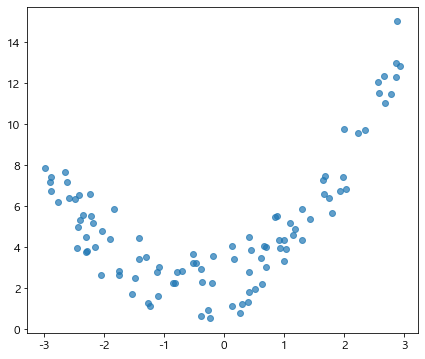

In [112]:
plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.7)
plt.show()

##### 모델생성, 학습

In [113]:
from sklearn.linear_model import LinearRegression
from metrics import print_regression_metrics
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
lr = LinearRegression()
lr.fit(X, y)  # feature 1개 * coef_ + intercept_
print(lr.coef_, lr.intercept_)

[0.78189543] 5.175619278567209


In [115]:
0.78*X + 5.17

array([[5.3984472 ],
       [6.17708623],
       [5.6509326 ],
       [5.3800533 ],
       [4.81270446],
       [5.85278445],
       [4.87790815],
       [7.00349764],
       [7.33994172],
       [4.62450631],
       [6.53527318],
       [5.30522822],
       [5.48844855],
       [7.16179227],
       [3.16244875],
       [3.23776512],
       [2.9246221 ],
       [6.72666088],
       [6.47177359],
       [6.90165685],
       [7.40993384],
       [6.57006208],
       [4.98972342],
       [6.48287655],
       [3.38352431],
       [5.82483038],
       [3.50089339],
       [7.25105053],
       [5.27225015],
       [4.77061788],
       [4.06812026],
       [6.45341367],
       [4.96478355],
       [5.49027088],
       [2.91793627],
       [5.72053413],
       [5.69460798],
       [5.71725111],
       [7.24674101],
       [6.020919  ],
       [4.51249697],
       [4.87530954],
       [6.094914  ],
       [3.11185521],
       [5.95046823],
       [5.96858523],
       [3.81459039],
       [3.433

In [116]:
np.mean(y), np.max(y), np.min(y)

(5.047985043575299, 15.001579381231853, 0.5518093981997281)

In [117]:
pred = lr.predict(X)
print_regression_metrics(y, pred)

MSE:7.729204760808937, RMSE:2.7801447373848966, R Square:0.19138252437306003


In [118]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)

In [119]:
X_new.shape

(100, 1)

In [120]:
X_new

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

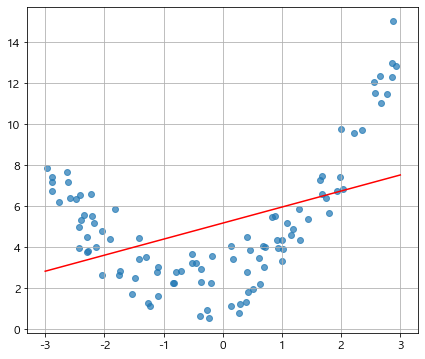

In [121]:
# 모델의 예측을 시각화
X_new = np.linspace(-3,3,100).reshape(-1, 1)
pred_new = lr.predict(X_new)  # -3 ~ 3 사이의 값들로 모델이 예측한 값들

plt.figure(figsize=(7,6))

plt.scatter(X, y, alpha=0.7) # 실제 데이터셋을 이용해서 scatter plot
plt.plot(X_new, pred_new, color='red')# -3 ~ 3 값을 이용해 예측한 값으로 line plot

plt.grid(True)
plt.show()

In [122]:
np.concatenate([X, X**2], axis=1)

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923],
       [ 0.87536468,  0.76626332],
       [-0.37447673,  0.14023282],
       [ 2.350638  ,  5.52549903],
       [ 2.78197656,  7.7393936 ],
       [-0.69935089,  0.48909166],
       [ 1.75035023,  3.06372592],
       [ 0.17336952,  0.03005699],
       [ 0.40826737,  0.16668224],
       [ 2.55357983,  6.52076995],
       [-2.57378365,  6.62436228],
       [-2.4772242 ,  6.13663975],
       [-2.87868962,  8.2868539 ],
       [ 1.99571907,  3.98289462],
       [ 1.66894051,  2.78536241],
       [ 2.22007289,  4.92872363],
       [ 2.87171005,  8.24671863],
       [ 1.79495139,  3.22185048],
       [-0.23112383,  0.05341822],
       [ 1.68317506,  2.83307827],
       [-2.29035344,  5.2457189 ],
       [ 0.83952613,  0.70480412],
       [-2.13988028,  4.57908759],
       [ 2.6680135 ,  7.11829605],
       [ 0.13108993,

##### PolynomialFeatures를 이용해 다항회귀 구현
- PolynomialFeautres: Transformer(변환기)
    - 기존 Feature에 N제곱한 Feature들을 생성해주는 변환기

In [123]:
from sklearn.preprocessing import PolynomialFeatures

In [124]:
poly_f = PolynomialFeatures(degree=2,  # 생성할 Feature의 최고차항 차수를 지정. (2: X + X**2,   3: X + X**2, X**3)
                            include_bias=False) # 상수항을 추가할 것인지 여부 (True: 모든값이 1인 Feature가 추가.)
X_poly = poly_f.fit_transform(X)

In [125]:
X.shape, X_poly.shape

((100, 1), (100, 2))

In [126]:
X[:5]

array([[ 0.29288102],
       [ 1.2911362 ],
       [ 0.61658026],
       [ 0.2692991 ],
       [-0.4580712 ]])

In [127]:
X_poly[:5]

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923]])

In [128]:
poly_f.get_feature_names_out()  #각 feature를 어떤 계산을 통해서 만들었는지 알려준다.

array(['x0', 'x0^2'], dtype=object)

##### LinearRegression 모델을 이용해 평가

In [129]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

In [130]:
print(lr2.coef_, lr2.intercept_)

[0.97906552 0.94978823] 2.340500756262887


In [131]:
pred2 = lr2.predict(X_poly)
print_regression_metrics(y, pred2, title="다항회귀")
print_regression_metrics(y, pred, title="변환없이")

다항회귀
MSE:0.9735576723414217, RMSE:0.9866902616026073, R Square:0.8981478985551461
변환없이
MSE:7.729204760808937, RMSE:2.7801447373848966, R Square:0.19138252437306003


##### 시각화

In [132]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
X_new_poly = poly_f.transform(X_new)
pred_new2 = lr2.predict(X_new_poly)

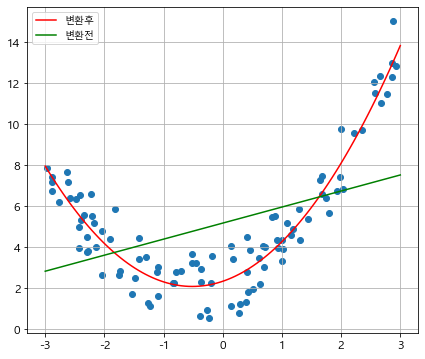

In [133]:
plt.figure(figsize=(7,6))

plt.scatter(X, y)  # 원래 데이터셋
plt.plot(X_new, pred_new2, color='red', label='변환후')  # -3 ~ 3 사이의 값을 이용해서 추론한 결과

plt.plot(X_new, lr.predict(X_new), color='green', label='변환전')

plt.legend()
plt.grid(True)
plt.show()

## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

In [134]:
pnf = PolynomialFeatures(degree=100, include_bias=False)
X_train_poly_100 = pnf.fit_transform(X)
X_train_poly_100.shape, X.shape

((100, 100), (100, 1))

In [135]:
pnf.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15',
       'x0^16', 'x0^17', 'x0^18', 'x0^19', 'x0^20', 'x0^21', 'x0^22',
       'x0^23', 'x0^24', 'x0^25', 'x0^26', 'x0^27', 'x0^28', 'x0^29',
       'x0^30', 'x0^31', 'x0^32', 'x0^33', 'x0^34', 'x0^35', 'x0^36',
       'x0^37', 'x0^38', 'x0^39', 'x0^40', 'x0^41', 'x0^42', 'x0^43',
       'x0^44', 'x0^45', 'x0^46', 'x0^47', 'x0^48', 'x0^49', 'x0^50',
       'x0^51', 'x0^52', 'x0^53', 'x0^54', 'x0^55', 'x0^56', 'x0^57',
       'x0^58', 'x0^59', 'x0^60', 'x0^61', 'x0^62', 'x0^63', 'x0^64',
       'x0^65', 'x0^66', 'x0^67', 'x0^68', 'x0^69', 'x0^70', 'x0^71',
       'x0^72', 'x0^73', 'x0^74', 'x0^75', 'x0^76', 'x0^77', 'x0^78',
       'x0^79', 'x0^80', 'x0^81', 'x0^82', 'x0^83', 'x0^84', 'x0^85',
       'x0^86', 'x0^87', 'x0^88', 'x0^89', 'x0^90', 'x0^91', 'x0^92',
       'x0^93', 'x0^94', 'x0^95', 'x0^96', 'x0^97', 'x0^98', 'x0^99',
       'x0^100'], dtyp

In [136]:
lr = LinearRegression()
lr.fit(X_train_poly_100, y)

LinearRegression()

In [137]:
lr.coef_.shape

(100,)

In [138]:
lr.coef_

array([-3.77528293e-35, -1.19268022e-32,  1.13197562e-32,  1.62837321e-33,
        2.08366728e-33,  4.30445225e-34, -1.51777342e-34, -1.02794155e-34,
        4.22239810e-36,  7.40154448e-36, -2.61528026e-35, -5.38499530e-34,
        5.20919081e-34, -1.17950628e-32, -1.41826836e-32,  6.32149218e-33,
        9.50692078e-65,  5.14602369e-57, -9.42670159e-57,  3.08915671e-56,
       -5.34824575e-56,  1.85823347e-55, -3.05203340e-55,  1.11929047e-54,
       -1.74930231e-54,  6.74605222e-54, -1.00574201e-53,  4.06542375e-53,
       -5.79366331e-53,  2.44795012e-52, -3.34037775e-52,  1.47176303e-51,
       -1.92558506e-51,  8.82905435e-51, -1.10869360e-50,  5.28122823e-50,
       -6.36938748e-50,  3.14775244e-49, -3.64726109e-49,  1.86811626e-48,
       -2.07943983e-48,  1.10312589e-47, -1.17905905e-47,  6.47628679e-47,
       -6.64041303e-47,  3.77697923e-46, -3.70965793e-46,  2.18618648e-45,
       -2.05254544e-45,  1.25464641e-44, -1.12285537e-44,  7.13125512e-44,
       -6.06125056e-44,  

In [139]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
X_new_poly_100 = pnf.transform(X_new)
pred_new_100 = lr.predict(X_new_poly_100)

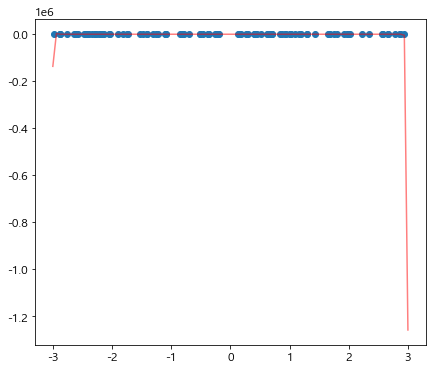

In [140]:
plt.figure(figsize=(7,6))
plt.scatter(X, y)
plt.plot(X_new, pred_new_100, color='r', alpha=0.5)
plt.show()

In [141]:
print_regression_metrics(y, pred_new_100)

MSE:16001219048.59061, RMSE:126495.92502760953, R Square:-1674022845.3905861


### PolynomialFeatures 예제

In [142]:
data = np.arange(12).reshape(4,3) #Feature: 3
print(data.shape)
data

(4, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [143]:
pnf2 = PolynomialFeatures(degree=2, include_bias=False)
data_poly = pnf2.fit_transform(data)
data_poly.shape

(4, 9)

In [144]:
pnf2.get_feature_names_out()
# feature 가 여러개일 경우 각 feature를 곱한 feature와 feature끼리 곱한(교차항) 값을 가지는 feature들을 생성한다.

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [145]:
pd.DataFrame(data_poly, columns=pnf2.get_feature_names_out())

,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,4.0
1,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,6.0,7.0,8.0,36.0,42.0,48.0,49.0,56.0,64.0
3,9.0,10.0,11.0,81.0,90.0,99.0,100.0,110.0,121.0


In [146]:
pnf3 = PolynomialFeatures(degree=5)
data_poly2 = pnf3.fit_transform(data)
data.shape,  data_poly2.shape

((4, 3), (4, 56))

In [147]:
pnf3.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

### 다항회귀를 Boston Dataset에 적용

In [148]:
X_train_scaled.shape

(379, 14)

In [149]:
# 전처리시 PolynomialFeature를 적용은 Dataset을 나누기(train,val,test) 전에 해도 상관없다. 
pnf = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = pnf.fit_transform(X_train_scaled)
X_test_scaled_poly = pnf.transform(X_test_scaled)

In [150]:
X_train_scaled.shape, X_train_scaled_poly.shape

((379, 14), (379, 119))

In [151]:
pnf.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4',
       'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11',
       'x0 x12', 'x0 x13', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5',
       'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12',
       'x1 x13', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7',
       'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x3^2',
       'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10',
       'x3 x11', 'x3 x12', 'x3 x13', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7',
       'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x5^2',
       'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12',
       'x5 x13', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11',
       'x6 x12', 'x6 x13', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11',
       'x7 x12', 'x7 x13', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11

##### 모델 생성 학습 추론 평가

In [152]:
lr3 = LinearRegression()
lr3.fit(X_train_scaled_poly, y_train)   # 전처리: Feature Scaling + PolynoimialFeature 

LinearRegression()

In [153]:
# 추론
pred_train3 = lr3.predict(X_train_scaled_poly)
pred_test3 = lr3.predict(X_test_scaled_poly)

In [154]:
# 검증
# 원본데이터셋을 학습한 검증결과에서 overfitting이 발생. -> 
#       PolynomialFeatures를 이용해 전처리를 해서 feature수를 늘리면 LinearRegression 모델은 더 복잡한 모델이 되어 Overfitting을 더 심하게 만든다.
print('PolynomialFeature 적용전 결과')
print_regression_metrics(y_train, pred_train, title='Train')
print_regression_metrics(y_test, pred_test, title='Test')

PolynomialFeature 적용전 결과
Train
MSE:19.640519427908046, RMSE:4.4317625644779355, R Square:0.7697699488741149
Test
MSE:29.782245092302407, RMSE:5.457311159564059, R Square:0.6354638433202124


In [155]:
print('PolynomialFeature 적용 후 결과-degree-2')
print_regression_metrics(y_train, pred_train3, title='Train poly')
print_regression_metrics(y_test, pred_test3, title='Test poly')

PolynomialFeature 적용 후 결과-degree-2
Train poly
MSE:4.09231630944325, RMSE:2.0229474312110165, R Square:0.952029059282025
Test poly
MSE:31.957178742416264, RMSE:5.653068082237845, R Square:0.6088425475989248


#### Degree=5
- Overfitting

In [156]:
pnf2 = PolynomialFeatures(degree=5, include_bias=False)
X_train_scaled_poly2 = pnf2.fit_transform(X_train_scaled)
X_test_scaled_poly2 = pnf2.transform(X_test_scaled)
X_train_scaled.shape, X_train_scaled_poly2.shape

((379, 14), (379, 11627))

In [157]:
lr = LinearRegression()
lr.fit(X_train_scaled_poly2, y_train)

LinearRegression()

In [158]:
pred_train4 = lr.predict(X_train_scaled_poly2)
pred_test4 = lr.predict(X_test_scaled_poly2)

In [159]:
print('PolynomialFeature 적용 후 결과-degree-5')
print_regression_metrics(y_train, pred_train4, title="Train")
print_regression_metrics(y_test, pred_test4, title='Test')

PolynomialFeature 적용 후 결과-degree-5
Train
MSE:1.817459170554153e-24, RMSE:1.3481317333829632e-12, R Square:1.0
Test
MSE:75403.5735514316, RMSE:274.5971113311857, R Square:-921.9434791490922


PolynomialFeatures를 이용한 전처리 -> 검증결과 underfitting이 발생하면  LinearRegression 모델을 좀더 복잡한 모델로 만들어 주기 위해서 적용하는 전처리.

Train data에 Feature **너무** 많으면 Overfitting이 발생. => LinearRegression 모델이 **너무** 복잡한 모델이 되기 때문에

## 규제 (Regularization) 
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.

### 예제

In [160]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

data = load_boston()
X, y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Playdata\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [163]:
from sklearn.linear_model import Ridge  # L2규제를 적용한 Linear Regression 모델

# 객체 생성
ridge1 = Ridge(random_state=0)  # alpha: 1.0 (기본) - 규제항의 값을 조절하는 규제하이퍼파라미터
# 학습
ridge1.fit(X_train_scaled, y_train)
# 추론
pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

In [164]:
from metrics import print_regression_metrics

In [165]:
print('alpha=1')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

alpha=1
Train
MSE:19.64194935381896, RMSE:4.431923888540839, R Square:0.76975318699993
Test
MSE:29.853763334547608, RMSE:5.463859746968951, R Square:0.6345884564889054


In [166]:
ridge1.coef_

array([-0.96187481,  1.02775462, -0.06861144,  0.59814087, -1.77318401,
        2.6205672 , -0.20466821, -2.96504904,  2.00091047, -1.85840697,
       -2.14955893,  0.75175979, -3.57350065])

In [167]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha=0.01, random_state=0) #alpah=0.01
ridge1.fit(X_train_scaled, y_train)
pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

print('alpha=0.01')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

alpha=0.01
Train
MSE:19.6405195795332, RMSE:4.431762581584578, R Square:0.7697699470967347
Test
MSE:29.782964300126416, RMSE:5.457377053138845, R Square:0.6354550401807847


In [168]:
ridge1.coef_

array([-0.97090686,  1.04648351, -0.04074187,  0.59413006, -1.80840456,
        2.61003017, -0.19830017, -3.00178921,  2.07939188, -1.93211252,
       -2.15735709,  0.75198861, -3.59010071])

In [169]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha=1000, random_state=0) #alpah=100  # 규제강도를 크게
ridge1.fit(X_train_scaled, y_train)
pred_train1 = ridge1.predict(X_train_scaled)
pred_test1 = ridge1.predict(X_test_scaled)

print('alpha=1000')
print_regression_metrics(y_train, pred_train1, title='Train')
print_regression_metrics(y_test, pred_test1, title="Test")

# 알파를 1.0 했을때에 비해서 underfitting발생 -> 단순모델

alpha=1000
Train
MSE:37.6379127019148, RMSE:6.13497454778052, R Square:0.55880094732523
Test
MSE:47.385118128796044, RMSE:6.883684923701552, R Square:0.42000380451661745


In [170]:
ridge1.coef_
# 알파를 1.0을 했으때의 weight와 비교해서 전체적으로 0에 가깝게 weight가 작아진 것을 볼 수 있다.

array([-0.44267768,  0.38220219, -0.51288178,  0.3335525 , -0.37129939,
        1.25386598, -0.32729508, -0.06287806, -0.28302417, -0.47738562,
       -0.87977916,  0.4225767 , -1.16283877])

## GridSearchCV를 이용해 최적의 alpha 탐색

In [171]:
from sklearn.model_selection import GridSearchCV
param = {"alpha":[0.01, 0.1, 1, 5, 10, 20, 30, 40, 100]}
ridge = Ridge(random_state=0)
gs = GridSearchCV(ridge, param, cv=4, scoring=['r2', 'neg_mean_squared_error'], refit='r2')

gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=4, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 20, 30, 40, 100]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [172]:
result_df = pd.DataFrame(gs.cv_results_)
result_df.sort_values('rank_test_r2').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
5,0.001246,0.000431,0.001496,0.000864,20,{'alpha': 20},0.769783,0.645949,0.646802,0.818040,0.720144,0.075716,1,-17.823357,-26.999550,-30.525873,-18.104060,-23.363210,5.542457,2
4,0.002494,0.001496,0.000997,0.000705,10,{'alpha': 10},0.762913,0.645798,0.650567,0.820667,0.719986,0.074670,2,-18.355176,-27.011065,-30.200460,-17.842694,-23.352349,5.376125,1
6,0.001496,0.000497,0.001251,0.000435,30,{'alpha': 30},0.773569,0.646587,0.644039,0.814082,0.719569,0.075631,3,-17.530173,-26.950941,-30.764711,-18.497835,-23.435915,5.597524,4
3,0.001001,0.000010,0.000496,0.000496,5,{'alpha': 5},0.757436,0.646131,0.653369,0.820574,0.719378,0.073163,4,-18.779233,-26.985694,-29.958289,-17.851926,-23.393786,5.196172,3
7,0.001251,0.000437,0.000996,0.000008,40,{'alpha': 40},0.775585,0.647291,0.641584,0.809645,0.718526,0.075088,5,-17.374137,-26.897195,-30.976839,-18.939336,-23.546877,5.607163,8


## 규제 alpha 에 따른 weight 변화

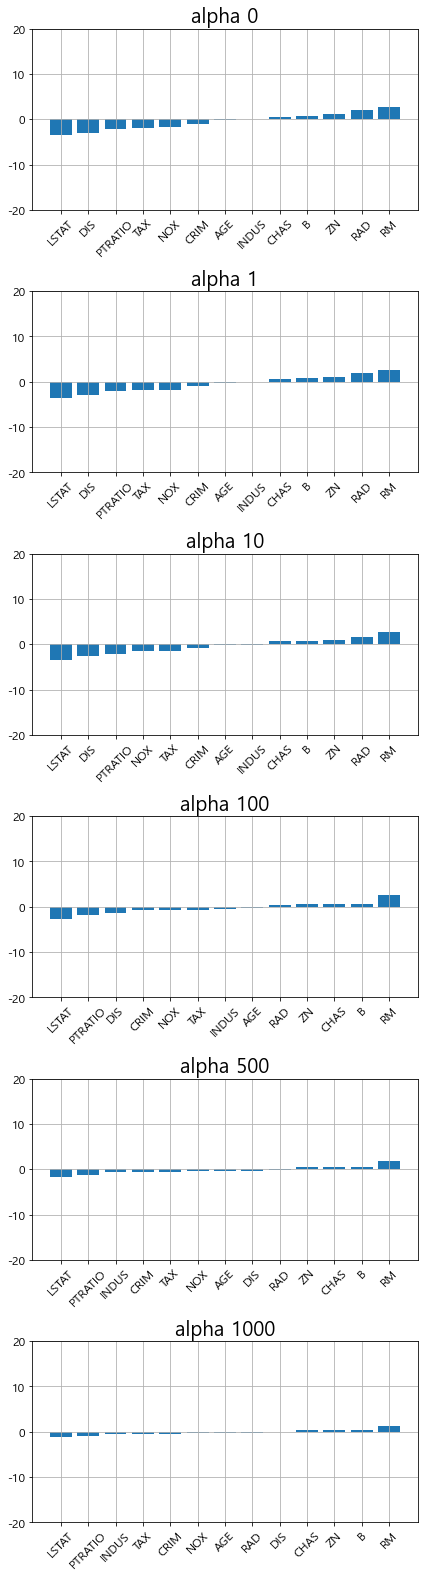

In [175]:
import matplotlib.pyplot as plt
np.random.seed(1)
alpha_list = [0,  1, 10, 100,500,1000]
coef_df = pd.DataFrame()

plt.figure(figsize=(6,25))
for idx, alpha in enumerate(alpha_list, start=1):

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    pred_train = ridge.predict(X_train_scaled)
    pred_test = ridge.predict(X_test_scaled)

#     각 feature(컬럼)들에 곱해지는 weight들을 Series로 만들기
    w = pd.Series(np.round(ridge.coef_,3), index=data["feature_names"])
    coef_df[f'alpha {alpha}'] = w.copy()  # weight serise를 DataFrame에 추가
    
    w = w.sort_values()
    # weight 그래프로 출력
    plt.subplot(7,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20)
    plt.title(f"alpha {alpha}")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [177]:
coef_df

,alpha 0,alpha 1,alpha 10,alpha 100,alpha 500,alpha 1000
CRIM,-0.971,-0.962,-0.899,-0.703,-0.535,-0.443
ZN,1.047,1.028,0.896,0.542,0.432,0.382
INDUS,-0.040,-0.069,-0.242,-0.539,-0.571,-0.513
CHAS,0.594,0.598,0.623,0.643,0.470,0.334
NOX,-1.809,-1.773,-1.513,-0.686,-0.406,-0.371
RM,2.610,2.621,2.690,2.650,1.776,1.254
AGE,-0.198,-0.205,-0.245,-0.308,-0.333,-0.327
DIS,-3.002,-2.965,-2.672,-1.379,-0.332,-0.063
RAD,2.080,2.001,1.487,0.302,-0.209,-0.283
TAX,-1.933,-1.858,-1.398,-0.630,-0.527,-0.477


## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

### 예제

In [178]:
from sklearn.linear_model import Lasso

In [179]:
# alpah 하이퍼파라미터로 규제 강도를 설정(기본: 1.0) - 클수록 강한 규제 -> 강한규제: 더 단순한 모델을 만든다.  
lasso = Lasso(random_state=0) #alpha: 1.0
lasso.fit(X_train_scaled, y_train)
pred_train = lasso.predict(X_train_scaled)
pred_test = lasso.predict(X_test_scaled)

print('alpha=1')
print_regression_metrics(y_train, pred_train, "alpha=1 Train")
print_regression_metrics(y_test, pred_test, "alpha=1 Test")

alpha=1
alpha=1 Train
MSE:25.38793844433231, RMSE:5.038644504659196, R Square:0.702397567056503
alpha=1 Test
MSE:35.48963616828034, RMSE:5.957317866983458, R Square:0.5656050935497574


In [180]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.52933025, -0.        , -0.        , -0.        , -0.22763148,
       -1.70088382,  0.13186059, -3.60565498])

In [181]:
lasso = Lasso(alpha=10, random_state=0) #alpha=10
lasso.fit(X_train_scaled, y_train)
pred_train = lasso.predict(X_train_scaled)
pred_test = lasso.predict(X_test_scaled)

print('alpha=10')
print_regression_metrics(y_train, pred_train, "alpha=10 Train")
print_regression_metrics(y_test, pred_test, "alpha=10 Test")

alpha=10
alpha=10 Train
MSE:85.30823553163789, RMSE:9.236245748768159, R Square:0.0
alpha=10 Test
MSE:81.7904659829155, RMSE:9.043808157126925, R Square:-0.001119359203955339


In [182]:
lasso.intercept_

22.608707124010557

In [183]:
lasso.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

In [185]:
pred_test

array([22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60870712,
       22.60870712, 22.60870712, 22.60870712, 22.60870712, 22.60

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6400\2860725074.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train_scaled, y_train)
C:\Users\Playdata\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Playdata\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.722e+03, tolerance: 3.233e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast

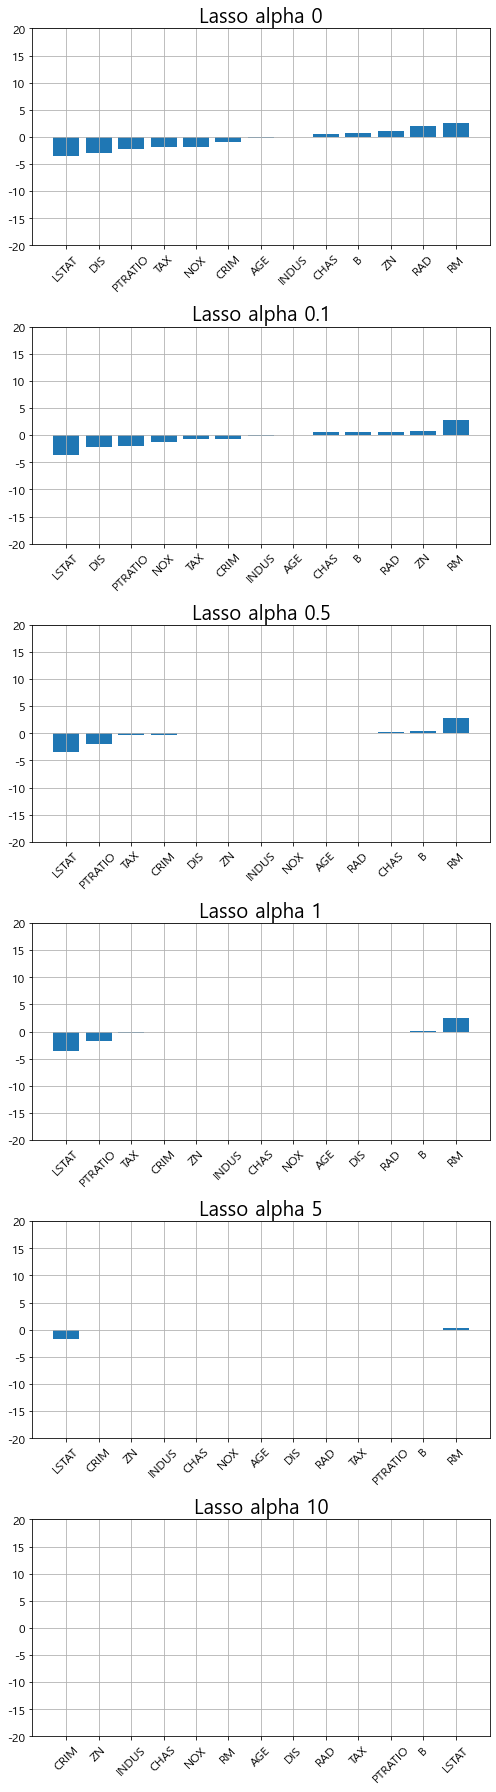

In [186]:
import matplotlib.pyplot as plt
alpha_list = [0, 0.1, 0.5, 1, 5, 10]

lasso_coef_df = pd.DataFrame()

plt.figure(figsize=(7,25))
for idx, alpha in enumerate(alpha_list, start=1):
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_scaled, y_train)
    
    w = pd.Series(lasso.coef_, index=data["feature_names"])
    lasso_coef_df[f'alpha {alpha}'] = w
    
    # weight 들을 막대그래프로 시각화
    w = w.copy().sort_values()
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20)
    plt.grid(True)
    plt.title(f"Lasso alpha {alpha}")
    
plt.tight_layout()
plt.show()    

In [187]:
lasso_coef_df

,alpha 0,alpha 0.1,alpha 0.5,alpha 1,alpha 5,alpha 10
CRIM,-0.971001,-0.659315,-0.236287,-0.000000,-0.000000,-0.0
ZN,1.046678,0.684820,0.000000,0.000000,0.000000,0.0
INDUS,-0.040448,-0.207389,-0.000000,-0.000000,-0.000000,-0.0
CHAS,0.594088,0.575874,0.303608,0.000000,0.000000,0.0
NOX,-1.808769,-1.345790,-0.000000,-0.000000,-0.000000,-0.0
RM,2.609920,2.738958,2.859242,2.529330,0.374985,0.0
AGE,-0.198233,-0.007398,-0.000000,-0.000000,-0.000000,-0.0
DIS,-3.002166,-2.216914,-0.003686,-0.000000,0.000000,0.0
RAD,2.080216,0.632402,-0.000000,-0.000000,-0.000000,-0.0
TAX,-1.932890,-0.724794,-0.291927,-0.227631,-0.000000,-0.0


###  PolynomialFeatures로 전처리한 Boston Dataset에 Ridge, Lasso  규제 적용
- degree 2로 전처리한 데이터셋 이용

In [189]:
X_train_scaled_poly.shape

(379, 119)

In [190]:
alpha_list = [0.01, 0.1, 1, 10, 100]

In [191]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

##### LinearRegression으로 평가

In [192]:
# 생성
lr = LinearRegression()
# 학습
lr.fit(X_train_scaled_poly, y_train)
# 추론
pred_train_lr = lr.predict(X_train_scaled_poly)
pred_test_lr = lr.predict(X_test_scaled_poly)
# 평가
print_regression_metrics(y_train, pred_train_lr, title="LinearRegression Train")
print_regression_metrics(y_test, pred_test_lr, title="LinearRegression Test")

LinearRegression Train
MSE:4.09231630944325, RMSE:2.0229474312110165, R Square:0.952029059282025
LinearRegression Test
MSE:31.957178742416264, RMSE:5.653068082237845, R Square:0.6088425475989248


##### Ridge 의 alpha값 변화에 따른 R square 확인

In [199]:
# alpha별 R square값들을 저장할 리스트
alpha_list = [0.01, 0.1, 1, 10, 100]

ridge_train_metrics_list = []
ridge_test_metrics_list = []

for alpha in alpha_list:
#     객체 생성
    ridge = Ridge(alpha=alpha, random_state=0)
#     학습
    ridge.fit(X_train_scaled_poly, y_train)
#     추론
    pred_train = ridge.predict(X_train_scaled_poly)
    pred_test = ridge.predict(X_test_scaled_poly)
#     평가(r2) - 평가결과를 list에 append
    ridge_train_metrics_list.append(r2_score(y_train, pred_train))
    ridge_test_metrics_list.append(r2_score(y_test, pred_test))

In [198]:
ridge_result = pd.DataFrame({
    "alpha":alpha_list,
    "train":ridge_train_metrics_list,
    "test":ridge_test_metrics_list
})

ridge_result

,alpha,train,test
0,0.01,0.951620,0.616821
1,0.10,0.951047,0.625563
2,1.00,0.948250,0.647907
3,10.00,0.938756,0.742694
4,100.00,0.902752,0.760789
5,110.00,0.899518,0.757935
6,120.00,0.896358,0.755043
7,130.00,0.893269,0.752138
8,140.00,0.890247,0.749237


##### lasso 의 alpha값 변화에 따른 R square 확인

In [202]:
# 평가결과를 저장할 리스트

alpha_list = [0.08, 0.1, 0.2, 0.3, 0.4, 0.5]
lasso_train_metrics_list = []
lasso_test_metrics_list = []

for alpha in alpha_list:
#     모델 생성
    lasso = Lasso(alpha=alpha, random_state=0)
#     학습
    lasso.fit(X_train_scaled_poly, y_train)
#     추론
    pred_train = lasso.predict(X_train_scaled_poly)
    pred_test = lasso.predict(X_test_scaled_poly)
#     평가 - 평가결과를 list에 추가
    lasso_train_metrics_list.append(r2_score(y_train, pred_train))
    lasso_test_metrics_list.append(r2_score(y_test, pred_test))

In [203]:
lasso_result = pd.DataFrame({
    "alpha":alpha_list,
    "train":lasso_train_metrics_list,
    "test":lasso_test_metrics_list
})

lasso_result

,alpha,train,test
0,0.08,0.916603,0.785221
1,0.10,0.910694,0.776982
2,0.20,0.885231,0.741608
3,0.30,0.872731,0.734248
4,0.40,0.861733,0.726547
5,0.50,0.849669,0.719609


## ElasticNet(엘라스틱넷)
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 라쏘 규제항을 더해서 추가한다. 
- 혼합비율 $r$을 사용해 혼합정도를 조절($r$은 Lassa(L1규제) 쪽 비율)
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [206]:
from sklearn.linear_model import ElasticNet

# 모델 생성
elastic = ElasticNet(alpha=0.1, l1_ratio=0.6) #alpha 페날티(규제강도), l1_ratio: 비율(라쏘쪽. 위의것으로 보면 앞의것의 r 지정.)
# 학습
elastic.fit(X_train_scaled, y_train)

# 추론
pred_train = elastic.predict(X_train_scaled)
pred_test = elastic.predict(X_test_scaled)
# 평가
print_regression_metrics(y_train, pred_train, title='ElasticNet alpha 0.1: Train')
print_regression_metrics(y_test, pred_test, title="ElasticNet alpha 0.1: Trest")

ElasticNet alpha 0.1: Train
MSE:20.128961453751398, RMSE:4.486531115879104, R Square:0.7640443348955887
ElasticNet alpha 0.1: Trest
MSE:31.441232021951834, RMSE:5.607248168393462, R Square:0.6151577610405823


# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 **ElasticNet**을 사용한다.